In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from scipy.stats import uniform
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import warnings
from sklearn.svm import SVC

warnings.filterwarnings('ignore')

C:\Users\himan\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
train_data = pd.read_csv('train_QA.csv')


In [3]:
test_data = pd.read_csv('test_QA.csv')


In [4]:
print(train_data.shape)
print(test_data.shape)

(6079, 41)
(476, 11)


In [5]:
train_features = train_data.iloc[:, :11]
train_features


,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,photo.stackexchange.com
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,rpg.stackexchange.com
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,electronics.stackexchange.com
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,judaism.stackexchange.com
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,graphicdesign.stackexchange.com
...,...,...,...,...,...,...,...,...,...,...,...
6074,9642,Using a ski helmet for winter biking,I am curious if anyone uses a skiing helmet fo...,sixtyfootersdude,https://bicycles.stackexchange.com/users/134,If you're thinking about wearing a ski helmet ...,Matt Leo,https://bicycles.stackexchange.com/users/3340,http://bicycles.stackexchange.com/questions/99...,CULTURE,bicycles.stackexchange.com
6075,9643,Adjustment to road bike brakes for high grade ...,I have a road bike with a front brake that wea...,ash,https://bicycles.stackexchange.com/users/14519,\nYou can replace the pads (as stated elsewher...,Daniel R Hicks,https://bicycles.stackexchange.com/users/1584,http://bicycles.stackexchange.com/questions/25...,CULTURE,bicycles.stackexchange.com
6076,9645,Suppress 'file truncated' messages when using ...,I'm tailing a log file using tail -f messages....,Maneating Koala,https://unix.stackexchange.com/users/60445,Maybe help if can be fixes origin of this erro...,BG Bruno,https://unix.stackexchange.com/users/68208,http://unix.stackexchange.com/questions/169054...,TECHNOLOGY,unix.stackexchange.com
6077,9646,When should a supervisor be a co-author?,What are people's views on this? To be specif...,MrB,https://mathoverflow.net/users/2189,"As a non-mathematician, I am somewhat mystifie...",angela,https://mathoverflow.net/users/4267,http://mathoverflow.net/questions/57337,SCIENCE,mathoverflow.net


In [6]:
target = train_data.iloc[:, -30:]
target

,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,1.000000,0.333333,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.0,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.000000,0.000000,0.000000,1.000000
1,1.000000,1.000000,0.000000,0.500000,1.000000,1.0,0.444444,0.444444,0.666667,0.0,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.000000,0.000000,0.666667,0.888889
2,0.888889,0.666667,0.000000,1.000000,1.000000,1.0,0.666667,0.444444,0.333333,0.0,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.000000,0.333333,1.000000,0.888889
3,0.888889,0.666667,0.666667,1.000000,1.000000,1.0,0.444444,0.444444,0.000000,0.0,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.000000,0.000000,1.000000,1.000000
4,1.000000,0.666667,0.000000,1.000000,1.000000,1.0,0.666667,0.666667,0.000000,0.0,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.000000,0.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6074,1.000000,0.777778,0.000000,1.000000,1.000000,1.0,0.888889,0.888889,0.333333,0.0,...,0.777778,1.000000,0.555556,1.000000,1.000000,0.866667,0.000000,0.000000,0.000000,0.888889
6075,1.000000,0.777778,0.000000,1.000000,0.666667,0.5,0.777778,0.777778,0.000000,0.0,...,0.777778,0.888889,0.555556,1.000000,1.000000,0.733333,0.666667,0.333333,0.000000,0.888889
6076,0.888889,0.555556,0.000000,0.666667,0.333333,1.0,0.444444,0.333333,0.000000,0.0,...,0.444444,0.888889,0.555556,0.888889,0.888889,0.800000,1.000000,0.000000,0.333333,0.555556
6077,1.000000,0.444444,0.333333,0.000000,0.000000,0.0,0.777778,0.555556,1.000000,0.0,...,1.000000,0.888889,0.555556,1.000000,1.000000,0.533333,0.000000,0.333333,0.666667,1.000000


In [7]:
test_data


,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host
0,39,Will leaving corpses lying around upset my pri...,I see questions/information online about how t...,Dylan,https://gaming.stackexchange.com/users/64471,There is no consequence for leaving corpses an...,Nelson868,https://gaming.stackexchange.com/users/97324,http://gaming.stackexchange.com/questions/1979...,CULTURE,gaming.stackexchange.com
1,46,Url link to feature image in the portfolio,I am new to Wordpress. i have issue with Featu...,Anu,https://wordpress.stackexchange.com/users/72927,I think it is possible with custom fields.\n\n...,Irina,https://wordpress.stackexchange.com/users/27233,http://wordpress.stackexchange.com/questions/1...,TECHNOLOGY,wordpress.stackexchange.com
2,70,"Is accuracy, recoil or bullet spread affected ...","To experiment I started a bot game, toggled in...",Konsta,https://gaming.stackexchange.com/users/37545,You do not have armour in the screenshots. Thi...,Damon Smithies,https://gaming.stackexchange.com/users/70641,http://gaming.stackexchange.com/questions/2154...,CULTURE,gaming.stackexchange.com
3,132,Suddenly got an I/O error from my external HDD,I have used my Raspberry Pi as a torrent-serve...,robbannn,https://raspberrypi.stackexchange.com/users/17341,Your Western Digital hard drive is disappearin...,HeatfanJohn,https://raspberrypi.stackexchange.com/users/1311,http://raspberrypi.stackexchange.com/questions...,TECHNOLOGY,raspberrypi.stackexchange.com
4,200,Passenger Name - Flight Booking Passenger only...,I have bought Delhi-London return flights for ...,Amit,https://travel.stackexchange.com/users/29089,I called two persons who work for Saudia (tick...,Nean Der Thal,https://travel.stackexchange.com/users/10051,http://travel.stackexchange.com/questions/4704...,CULTURE,travel.stackexchange.com
...,...,...,...,...,...,...,...,...,...,...,...
471,9569,change gb4e enumeration in only one chapter,I am using gb4e for glossing examples in my th...,ToddAO,https://tex.stackexchange.com/users/28332,You can simply reset the exx counter just afte...,karlkoeller,https://tex.stackexchange.com/users/27635,http://tex.stackexchange.com/questions/165120/...,TECHNOLOGY,tex.stackexchange.com
472,9590,All anagrams in a File,Source : Microsoft Interview Question\n\nWe ar...,Spandan,https://stackoverflow.com/users/2426101,Slightly different approach from the one above...,Algorithmatic,https://stackoverflow.com/users/1122229,http://stackoverflow.com/questions/16872513/al...,STACKOVERFLOW,stackoverflow.com
473,9597,SQL Server: Time Series Table Design,I am creating a time series database that foll...,Jay Michael,https://dba.stackexchange.com/users/47001,A foreign key can reference a unique constrain...,mustaccio,https://dba.stackexchange.com/users/23721,http://dba.stackexchange.com/questions/105287/...,TECHNOLOGY,dba.stackexchange.com
474,9623,Is a countered flashback spell exiled?,If I flashback Past in Flames and it is counte...,BolasStone,https://boardgames.stackexchange.com/users/9981,If you counter a spell cast for its Flashback ...,murgatroid99,https://boardgames.stackexchange.com/users/2537,http://boardgames.stackexchange.com/questions/...,CULTURE,boardgames.stackexchange.com


# preprocessing

In [8]:
'''
remove --> HTML tags
remove --> URLs
remove --> Emojis
remove --> Stopwords
remove --> Punctuations
Expanding Abbreviations

usinr regex
'''

'\nremove --> HTML tags\nremove --> URLs\nremove --> Emojis\nremove --> Stopwords\nremove --> Punctuations\nExpanding Abbreviations\n\nusinr regex\n'

In [9]:
import re


In [10]:
# first function to remove punctuation
def remove_punctuation(text):
    """Remove punctuation from a given text string."""
    return re.sub(r'[^\w\s]', '', text)

text = "Hello, world! This is some text with punctuation."
clean_text = remove_punctuation(text)
print(clean_text)


Hello world This is some text with punctuation


In [11]:
from bs4 import BeautifulSoup
# remove html tages
def remove_html(text):
    """Remove HTML tags from a given text string."""
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

html_text = "<p>Hello, <strong>world</strong>!</p>"
clean_text = remove_html(html_text)
print(clean_text)


Hello, world!


In [12]:
# function to remove urls or links
import re

def remove_urls(text):
    """Remove URLs from a given text string."""
    return re.sub(r'https?://\S+|www\.\S+', '', text)

text = "Check out my website at https://www.example.com!"
clean_text = remove_urls(text)
print(clean_text)

Check out my website at 


In [13]:
# remove emoji
def remove_emoji(text):
    """Remove emoji from a given text string."""
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"  # other miscellaneous symbols
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
text = "Hello! 👋 How are you? 😊 "
clean_text = remove_emoji(text)
print(clean_text)

Hello!  How are you?  


In [14]:
def expand_abbreviations(text):
    """Expand common English language abbreviations to their full form."""
    abbreviations = {
        'ain\'t': 'am not',
        'aren\'t': 'are not',
        'can\'t': 'cannot',
        'could\'ve': 'could have',
        'couldn\'t': 'could not',
        'didn\'t': 'did not',
        'doesn\'t': 'does not',
        'don\'t': 'do not',
        'hadn\'t': 'had not',
        'hasn\'t': 'has not',
        'haven\'t': 'have not',
        'he\'d': 'he had',
        'he\'ll': 'he will',
        'he\'s': 'he is',
        'how\'d': 'how did',
        'how\'ll': 'how will',
        'how\'s': 'how is',
        'I\'d': 'I had',
        'I\'ll': 'I will',
        'I\'m': 'I am',
        'I\'ve': 'I have',
        'isn\'t': 'is not',
        'it\'d': 'it had',
        'it\'ll': 'it will',
        'it\'s': 'it is',
        'let\'s': 'let us',
        'ma\'am': 'madam',
        'might\'ve': 'might have',
        'mightn\'t': 'might not',
        'must\'ve': 'must have',
        'mustn\'t': 'must not',
        'needn\'t': 'need not',
        'o\'clock': 'of the clock',
        'oughtn\'t': 'ought not',
        'shan\'t': 'shall not',
        'she\'d': 'she had',
        'she\'ll': 'she will',
        'she\'s': 'she is',
        'should\'ve': 'should have',
        'shouldn\'t': 'should not',
        'somebody\'s': 'somebody is',
        'someone\'s': 'someone is',
        'something\'s': 'something is',
        'that\'d': 'that had',
        'that\'ll': 'that will',
        'that\'s': 'that is',
        'there\'d': 'there had',
        'there\'ll': 'there will',
        'there\'s': 'there is',
        'they\'d': 'they had',
        'they\'ll': 'they will',
        'they\'re': 'they are',
        'they\'ve': 'they have',
        'wasn\'t': 'was not',
        'we\'d': 'we had',
        'we\'ll': 'we will',
        'we\'re': 'we are',
        'we\'ve': 'we have',
        'weren\'t': 'were not',
        'what\'d': 'what did',
        'what\'ll': 'what will',
        'what\'re': 'what are',
        'what\'s': 'what is',
        'what\'ve': 'what have',
        'when\'s': 'when is',
        'where\'d': 'where did',
        'where\'s': 'where is',
        'who\'d': 'who had',
        'who\'ll': 'who will',
        'who\'s': 'who is',
        'who\'ve': 'who have',
        'why\'d': 'why did',
        'why\'ll': 'why will',
        'why\'s': 'why is',
        'won\'t': 'will not',
        'would\'ve': 'would have',
        'wouldn\'t': 'would not',
        'you\'d': 'you had',
        'you\'ll': 'you will',
        'you\'re': 'you are',
        'you\'ve': 'you have'
    }
    words = text.split()
    expanded_words = []
    for word in words:
        if word.lower() in abbreviations:
            expanded_words.append(abbreviations[word.lower()])
        else:
            expanded_words.append(word)
    return ' '.join(expanded_words)

text = "I ain't got time for this."
expanded_text = expand_abbreviations(text)
print(expanded_text)

I am not got time for this.


In [15]:
# remove stop words
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)
def remove_stopwords(text):
    """Remove stop words from a given text string."""
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)


{'m', 'didn', 'but', 'from', 'am', 'through', 'you', 'ourselves', 'so', 'few', 'at', 'those', 'we', 'after', 'then', 'theirs', 'isn', 'have', 'being', 'on', 'o', 'into', 'i', 'here', 'wouldn', 'were', 'in', 'don', 'will', 'down', 'yours', 'herself', 'who', 'should', 'out', 'll', 'and', 'mightn', 'your', 'this', 'because', 'their', 'there', 'above', 'below', 'by', 'do', 'doing', 'her', 'further', 'been', 'off', 'be', 'did', 'under', 'ain', 'won', 'had', 'of', 'how', 'other', 'to', 'which', "that'll", 'just', 'same', 'such', "wasn't", 'again', 'some', 'himself', 'up', 'during', 'only', 'too', "weren't", 'very', 'me', 's', "wouldn't", "it's", 'him', 'if', 'weren', 'while', 'myself', "don't", 'or', "won't", 'an', "hasn't", "haven't", "she's", 'than', 'ours', "isn't", 'no', "you're", "aren't", 'between', 'where', 'can', 'it', 'his', 'about', 'aren', 'ma', 'shouldn', "couldn't", "needn't", 'most', 'nor', 'does', 'both', 'that', 'themselves', "should've", 'doesn', 'is', 'against', 'wasn', "ha

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
text = "The quick brown fox jumps over the lazy dog."
filtered_text = remove_stopwords(text)
print(filtered_text)
# Output: "quick brown fox jumps lazy dog."

quick brown fox jumps lazy dog.


In [17]:
## combine all together...
from tqdm import tqdm

def preprocess_text(text_data):
    """Preprocess a list of text strings."""
    preprocessed_text = []
    for sentence in tqdm(text_data):
        # Expand abbreviations
        sentence = expand_abbreviations(sentence)

        # Remove HTML tags
        sentence = remove_html(sentence)

        # Remove URLs
        sentence = remove_urls(sentence)

        # Remove emojis
        sentence = remove_emoji(sentence)

        #Remove punctuation
        sentence = remove_punctuation(sentence)

        # Remove stop words
        sentence = remove_stopwords(sentence)

        preprocessed_text.append(sentence.lower().strip())

    return preprocessed_text

In [18]:
text = [ "I can't believe it's not butter! 😂 #@< https://example.com", "I CANNOT BELEIVE www.example.com"]
preprocessed_text = preprocess_text(text)
print(preprocessed_text)


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 696.32it/s]

['cannot believe butter', 'cannot beleive']


In [19]:
train_data.columns


Index(['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host', 'question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfa

In [20]:
print(train_data.question_title[0],"-----------------\n")
print(train_data.question_body[0],"-------------------\n")
print(train_data.answer[0])

What am I losing when using extension tubes instead of a macro lens? -----------------

After playing around with macro photography on-the-cheap (read: reversed lens, rev. lens mounted on a straight lens, passive extension tubes), I would like to get further with this. The problems with the techniques I used is that focus is manual and aperture control is problematic at best. This limited my setup to still subjects (read: dead insects) Now, as spring is approaching, I want to be able to shoot live insects. I believe that for this, autofocus and settable aperture will be of great help.

So, one obvious but expensive option is a macro lens (say, EF 100mm Macro) However, I am not really interested in yet another prime lens. An alternative is the electrical extension tubes.

Except for maximum focusing distance, what am I losing when using tubes (coupled with a fine lens, say EF70-200/2.8) instead of a macro lens?
 -------------------

I just got extension tubes, so here's the skinny.


  

In [21]:
# i will take only 5 features
X_train = train_features[['question_title', 'question_body', 'answer', 'category']]
X_test = test_data[['question_title', 'question_body', 'answer', 'category']]

In [22]:
# lets splitting first to train and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, target, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(4255, 4)
(1824, 4)
(4255, 30)
(1824, 30)


In [23]:
y_train

,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
274,0.888889,0.444444,0.000000,0.666667,0.333333,0.666667,0.555556,0.444444,0.000000,0.0,...,0.666667,1.000000,0.666667,1.000000,1.0,0.866667,1.000000,0.333333,0.000000,0.888889
5217,1.000000,0.666667,0.000000,0.666667,1.000000,1.000000,0.666667,0.333333,0.000000,0.0,...,0.888889,1.000000,0.777778,1.000000,1.0,1.000000,0.666667,0.333333,0.000000,0.777778
2918,0.888889,0.333333,0.333333,0.500000,0.666667,0.000000,0.555556,0.666667,0.666667,0.0,...,0.888889,0.888889,0.555556,1.000000,1.0,0.733333,0.000000,0.000000,1.000000,0.777778
1361,0.777778,0.444444,0.333333,0.333333,1.000000,0.333333,0.555556,0.333333,1.000000,0.0,...,0.666667,1.000000,0.666667,1.000000,1.0,0.933333,0.666667,0.666667,1.000000,0.888889
1897,0.888889,0.333333,0.000000,1.000000,1.000000,1.000000,0.777778,0.555556,0.333333,0.0,...,0.555556,1.000000,0.666667,0.888889,1.0,1.000000,0.000000,0.333333,0.666667,0.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.666667,1.000000,0.000000,1.000000,1.000000,0.500000,0.666667,0.333333,0.500000,0.0,...,0.666667,0.666667,0.666667,0.666667,1.0,0.800000,0.000000,0.000000,1.000000,0.666667
5191,1.000000,0.333333,0.000000,1.000000,1.000000,1.000000,0.333333,0.333333,1.000000,0.0,...,1.000000,1.000000,0.666667,1.000000,1.0,1.000000,1.000000,0.000000,1.000000,1.000000
5226,1.000000,0.444444,0.000000,0.666667,0.666667,1.000000,0.555556,0.666667,0.000000,0.0,...,0.666667,1.000000,0.666667,1.000000,1.0,0.933333,1.000000,0.000000,1.000000,0.888889
5390,1.000000,0.666667,0.000000,1.000000,0.333333,1.000000,0.555556,0.444444,0.333333,0.0,...,0.555556,0.888889,0.666667,1.000000,1.0,0.900000,0.333333,0.000000,1.000000,0.888889


In [24]:
y_val

,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
3320,0.777778,0.444444,0.0,0.500000,1.000000,1.000000,0.444444,0.333333,0.333333,0.0,...,0.777778,0.888889,0.666667,1.000000,1.000000,0.800000,0.333333,0.666667,0.666667,0.888889
296,0.888889,0.555556,1.0,0.333333,0.000000,0.000000,0.555556,0.777778,1.000000,0.0,...,1.000000,0.888889,0.666667,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
346,0.888889,0.666667,0.0,0.000000,0.333333,0.666667,0.777778,0.666667,1.000000,0.0,...,0.666667,0.833333,0.666667,0.833333,0.666667,0.600000,0.000000,0.000000,1.000000,0.777778
5001,0.777778,0.666667,0.0,0.500000,1.000000,1.000000,0.444444,0.333333,0.000000,0.0,...,0.888889,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.888889
544,1.000000,0.888889,0.0,0.666667,0.666667,1.000000,0.444444,0.333333,0.333333,0.0,...,0.888889,1.000000,0.666667,1.000000,1.000000,0.800000,0.666667,0.000000,0.666667,0.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,1.000000,0.777778,0.0,0.666667,0.333333,1.000000,0.444444,0.333333,0.000000,0.0,...,0.888889,0.888889,0.666667,1.000000,1.000000,0.800000,1.000000,0.000000,0.000000,0.888889
4556,1.000000,0.333333,0.0,0.000000,1.000000,0.000000,0.666667,1.000000,0.000000,0.0,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.933333,1.000000,0.000000,0.000000,1.000000
318,0.777778,0.444444,0.0,0.666667,0.666667,1.000000,0.444444,0.333333,0.666667,0.0,...,0.555556,1.000000,0.666667,1.000000,1.000000,0.800000,0.666667,0.333333,0.666667,0.888889
5989,1.000000,0.555556,0.0,1.000000,0.333333,1.000000,0.555556,0.333333,0.000000,0.0,...,0.666667,1.000000,0.666667,1.000000,1.000000,0.866667,0.000000,0.000000,1.000000,1.000000


In [25]:
from sklearn.preprocessing import OrdinalEncoder

o_en = OrdinalEncoder()
y_train_encoded = o_en.fit_transform(y_train)
y_val_encoded = o_en.transform(y_val)

In [26]:
# apply preprocessing to our text features

X_train['preprocessed_question_title'] = preprocess_text(X_train['question_title'].values)
X_train['preprocessed_question_body'] = preprocess_text(X_train['question_body'].values)
X_train['preprocessed_answer'] = preprocess_text(X_train['answer'].values)

##################################################################################################
X_val['preprocessed_question_title'] = preprocess_text(X_val['question_title'].values)
X_val['preprocessed_question_body'] = preprocess_text(X_val['question_body'].values)
X_val['preprocessed_answer'] = preprocess_text(X_val['answer'].values)
##################################################################################################
X_test['preprocessed_question_title'] = preprocess_text(X_test['question_title'].values)
X_test['preprocessed_question_body'] = preprocess_text(X_test['question_body'].values)
X_test['preprocessed_answer'] = preprocess_text(X_test['answer'].values)

100%|███████████████████████████████████████████████████████████████████████████████| 476/476 [00:01<00:00, 282.38it/s]


In [27]:
X_train


,question_title,question_body,answer,category,preprocessed_question_title,preprocessed_question_body,preprocessed_answer
274,Convert the_geom to text and then transform,I have this query that returns the_geom as tex...,This is a query I use to write out the LAT/LON...,TECHNOLOGY,convert the_geom text transform,query returns the_geom text however could also...,query use write latlon points data stored stat...
5217,How do I get a baby dragon pet?,I have seen players with a baby dragon as pet ...,There is a spider quest in the magic city scho...,CULTURE,get baby dragon pet,seen players baby dragon pet stendhal get one,spider quest magic city school see morgrin kil...
2918,Registration: Username and password or email a...,During a registration process what would the r...,"If the service has a social/community aspect, ...",TECHNOLOGY,registration username password email password,registration process would reasons using usern...,service socialcommunity aspect allow creating ...
1361,How do I ward properly in DotA 2?,I finally got my DotA 2 Beta invite. Now to le...,The linked guide that Arremer posted here is a...,CULTURE,ward properly dota 2,finally got dota 2 beta invite learn game read...,linked guide arremer posted absolutely awesome...
1897,"""Take offense"" usage","What prepositions do I use with ""take offense""...","While ""take offence at"" is used more frequentl...",CULTURE,take offense usage,prepositions use take offense specifically tak...,take offence used frequently take offense also...
...,...,...,...,...,...,...,...
3772,Is apt-get upgrade a dangerous command?,"When I use apt-get update and apt-get upgrade,...",apt-get update\n\n\nRefreshes the repositories...,TECHNOLOGY,aptget upgrade dangerous command,use aptget update aptget upgradethere packages...,aptget update refreshes repositories fetches i...
5191,lxc-create hangs and finally fails,I was trying to place some juju charms on linu...,Thanks Felipe for the workaround - for a compl...,TECHNOLOGY,lxccreate hangs finally fails,trying place juju charms linux containers cont...,thanks felipe workaround complete fix required...
5226,Noise canceling headphones make strange sound ...,"I've got headphones plugged into my desktop, a...",I have a similar issue with my MacBook Pro and...,TECHNOLOGY,noise canceling headphones make strange sound ...,ive got headphones plugged desktop laptop near...,similar issue macbook pro old pioneer amp when...
5390,Apple Push Notification - all messages get sen...,I have a problem with sending Apple Push Notif...,"\nAPNS is based on Apple Servers, and Apple do...",STACKOVERFLOW,apple push notification messages get sent get ...,problem sending apple push notifications send ...,apns based apple servers apple give guarantee ...


In [28]:
# print the first 10th most common words
from collections import Counter
count = Counter()
for text in X_train['preprocessed_question_title'].values:
    for word in text.split():
        count[word] +=1
count.most_common(10)

[('using', 168),
 ('use', 130),
 ('get', 115),
 ('way', 83),
 ('file', 81),
 ('server', 75),
 ('make', 74),
 ('page', 73),
 ('without', 70),
 ('data', 68)]

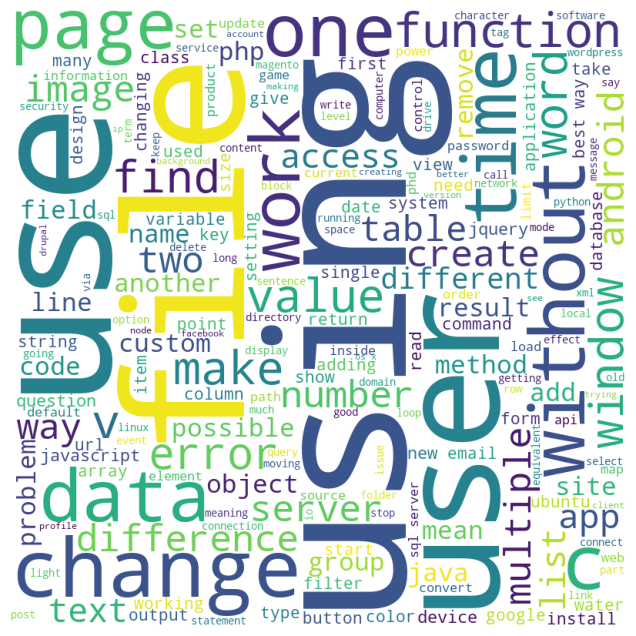

In [29]:
#plot the wordcloud image in question title

from wordcloud import WordCloud

# Concatenate all preprocessed texts into a single string
text = ' '.join(X_train['preprocessed_question_title'])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Plot the word cloud image
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [30]:
# print the first 10th most common words
from collections import Counter
count = Counter()
for text in X_train['preprocessed_question_body'].values:
    for word in text.split():
        count[word] +=1
count.most_common(10)


[('would', 1826),
 ('im', 1720),
 ('like', 1680),
 ('one', 1456),
 ('using', 1347),
 ('1', 1272),
 ('use', 1259),
 ('get', 1210),
 ('new', 1147),
 ('0', 1114)]

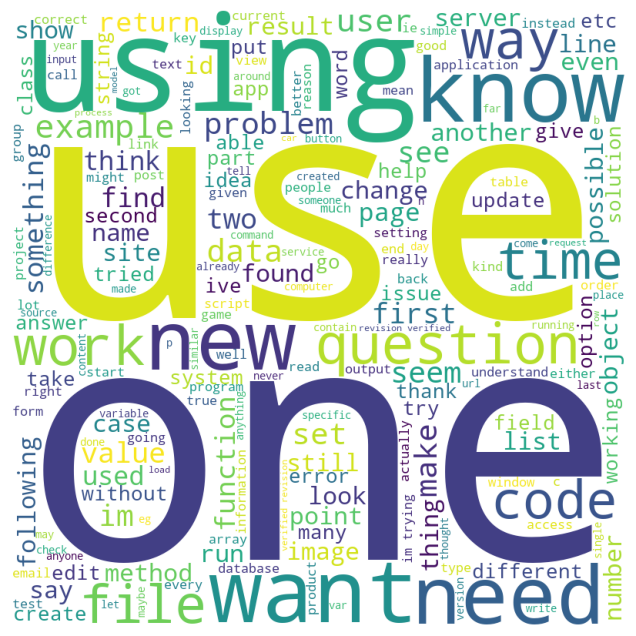

In [31]:
# in question body

from wordcloud import WordCloud

# Concatenate all preprocessed texts into a single string
text = ' '.join(X_train['preprocessed_question_body'])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Plot the word cloud image
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [32]:
# print the first 10th most common words
from collections import Counter
count = Counter()
for text in X_train['preprocessed_answer'].values:
    for word in text.split():
        count[word] +=1
count.most_common(10)

[('use', 1866),
 ('would', 1679),
 ('one', 1660),
 ('like', 1290),
 ('also', 1168),
 ('1', 1134),
 ('need', 1126),
 ('get', 1099),
 ('using', 1022),
 ('could', 930)]

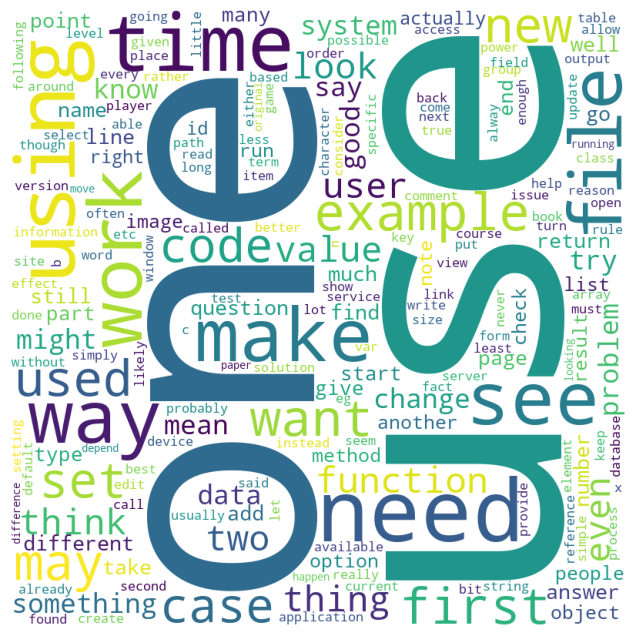

In [33]:
# wordcloud of answer

from wordcloud import WordCloud

# Concatenate all preprocessed texts into a single string
text = ' '.join(X_train['preprocessed_answer'])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Plot the word cloud image
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# TF-IDF && SVD

In [34]:
X_train


,question_title,question_body,answer,category,preprocessed_question_title,preprocessed_question_body,preprocessed_answer
274,Convert the_geom to text and then transform,I have this query that returns the_geom as tex...,This is a query I use to write out the LAT/LON...,TECHNOLOGY,convert the_geom text transform,query returns the_geom text however could also...,query use write latlon points data stored stat...
5217,How do I get a baby dragon pet?,I have seen players with a baby dragon as pet ...,There is a spider quest in the magic city scho...,CULTURE,get baby dragon pet,seen players baby dragon pet stendhal get one,spider quest magic city school see morgrin kil...
2918,Registration: Username and password or email a...,During a registration process what would the r...,"If the service has a social/community aspect, ...",TECHNOLOGY,registration username password email password,registration process would reasons using usern...,service socialcommunity aspect allow creating ...
1361,How do I ward properly in DotA 2?,I finally got my DotA 2 Beta invite. Now to le...,The linked guide that Arremer posted here is a...,CULTURE,ward properly dota 2,finally got dota 2 beta invite learn game read...,linked guide arremer posted absolutely awesome...
1897,"""Take offense"" usage","What prepositions do I use with ""take offense""...","While ""take offence at"" is used more frequentl...",CULTURE,take offense usage,prepositions use take offense specifically tak...,take offence used frequently take offense also...
...,...,...,...,...,...,...,...
3772,Is apt-get upgrade a dangerous command?,"When I use apt-get update and apt-get upgrade,...",apt-get update\n\n\nRefreshes the repositories...,TECHNOLOGY,aptget upgrade dangerous command,use aptget update aptget upgradethere packages...,aptget update refreshes repositories fetches i...
5191,lxc-create hangs and finally fails,I was trying to place some juju charms on linu...,Thanks Felipe for the workaround - for a compl...,TECHNOLOGY,lxccreate hangs finally fails,trying place juju charms linux containers cont...,thanks felipe workaround complete fix required...
5226,Noise canceling headphones make strange sound ...,"I've got headphones plugged into my desktop, a...",I have a similar issue with my MacBook Pro and...,TECHNOLOGY,noise canceling headphones make strange sound ...,ive got headphones plugged desktop laptop near...,similar issue macbook pro old pioneer amp when...
5390,Apple Push Notification - all messages get sen...,I have a problem with sending Apple Push Notif...,"\nAPNS is based on Apple Servers, and Apple do...",STACKOVERFLOW,apple push notification messages get sent get ...,problem sending apple push notifications send ...,apns based apple servers apple give guarantee ...


In [35]:
# concatnate features related to question first
X_train['preprocessed_question'] = X_train['preprocessed_question_title'] +\
                                                X_train['preprocessed_question_body']


X_val['preprocessed_question'] = X_val['preprocessed_question_title'] +\
                                                X_val['preprocessed_question_body']


X_test['preprocessed_question'] = X_test['preprocessed_question_title'] +\
                                                X_test['preprocessed_question_body']

In [36]:
vectorizer1 = TfidfVectorizer(ngram_range = (1,4), min_df=4)
X_train_question_tfidf = vectorizer1.fit_transform(X_train['preprocessed_question'])
X_val_question_tfidf = vectorizer1.transform(X_val['preprocessed_question'])
X_test_question_tfidf = vectorizer1.transform(X_test['preprocessed_question'])

vectorizer2 = TfidfVectorizer(ngram_range = (1,4), min_df=4)
X_train_answer_tfidf = vectorizer2.fit_transform(X_train['preprocessed_answer'])
X_val_answer_tfidf = vectorizer2.transform(X_val['preprocessed_answer'])
X_test_answer_tfidf = vectorizer2.transform(X_test['preprocessed_answer'])

In [37]:
print(vectorizer1.vocabulary_)


{'convert': 4487, 'text': 19164, 'returns': 16043, 'however': 9068, 'could': 4608, 'also': 1336, 'apply': 1754, 'transform': 19944, 'query': 15105, 'separately': 16996, 'second': 16738, 'example': 6822, 'though': 19438, 'would': 21914, 'like': 10772, 'rows': 16336, 'table': 18823, 'copied': 4505, 'output': 13371, 'select': 16899, 'could also': 4611, 'also apply': 1338, 'second example': 16740, 'though would': 19455, 'would like': 21994, 'query select': 15110, 'get': 8154, 'baby': 2282, 'dragon': 5907, 'players': 14119, 'pet': 13932, 'one': 13047, 'get one': 8194, 'registration': 15665, 'username': 20736, 'password': 13714, 'email': 6261, 'process': 14674, 'reasons': 15473, 'using': 20754, 'combinations': 3946, 'register': 15662, 'user': 20690, 'case': 3299, 'system': 18779, 'may': 11706, 'preferable': 14455, 'refer': 15595, 'instead': 9743, 'means': 11776, 'dont': 5855, 'create': 4801, 'two': 20166, 'items': 10080, 'choosing': 3554, 'either': 6171, 'option': 13275, 'relationship': 1569

In [38]:
X_train_question_tfidf.shape


(4255, 22273)

In [39]:
X_train_answer_tfidf.shape


(4255, 9274)

In [40]:
# lets reduce the dimension...
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components = 150)
X_train_question_svd = tsvd.fit_transform(X_train_question_tfidf)
X_val_question_svd = tsvd.transform(X_val_question_tfidf)
X_test_question_svd = tsvd.transform(X_test_question_tfidf)

X_train_answer_svd = tsvd.fit_transform(X_train_answer_tfidf)
X_val_answer_svd = tsvd.transform(X_val_answer_tfidf)
X_test_answer_svd = tsvd.transform(X_test_answer_tfidf)

In [41]:
X_train_question_svd.shape


(4255, 150)

In [42]:
X_train.category.value_counts()


category
TECHNOLOGY       1702
STACKOVERFLOW     880
CULTURE           672
SCIENCE           506
LIFE_ARTS         495
Name: count, dtype: int64

In [43]:
X_train.category.shape


(4255,)

In [44]:
feature_reshaped = np.reshape(X_train['category'].values, (-1, 1))
feature_reshaped.shape

(4255, 1)

In [45]:
# i will encode the category feature here using one hot encoded (we have only 5 values)
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
x_train_category_encoded = encoder.fit_transform(X_train.category.values.reshape(-1,1))
x_val_category_encoded = encoder.transform(X_val.category.values.reshape(-1,1))
x_test_category_encoded = encoder.transform(X_test.category.values.reshape(-1,1))


In [46]:
x_val_category_encoded.toarray().shape


(1824, 5)

In [47]:
encoder.categories_


[array(['CULTURE', 'LIFE_ARTS', 'SCIENCE', 'STACKOVERFLOW', 'TECHNOLOGY'],
       dtype=object)]

In [48]:
x_train_category_encoded.shape


(4255, 5)

In [49]:
unique_labels = np.unique(y_train[:].values)
unique_labels

array([0.        , 0.2       , 0.26666667, 0.3       , 0.33333333,
       0.4       , 0.44444444, 0.46666667, 0.5       , 0.53333333,
       0.55555556, 0.6       , 0.66666667, 0.66666667, 0.7       ,
       0.73333333, 0.77777778, 0.8       , 0.83333333, 0.86666667,
       0.88888889, 0.9       , 0.93333333, 1.        ])

In [50]:
# i will not seperate the features here
train_features = np.concatenate([X_train_question_svd,X_train_answer_svd, x_train_category_encoded.toarray()], axis = 1)
val_features = np.concatenate([X_val_question_svd,X_val_answer_svd, x_val_category_encoded.toarray()], axis = 1)
test_features = np.concatenate([X_test_question_svd,X_test_answer_svd, x_test_category_encoded.toarray()], axis = 1)

In [51]:
train_features.shape


(4255, 305)

In [52]:
val_features.shape

(1824, 305)

In [53]:
test_features

array([[ 0.1171603 , -0.07383255, -0.02494436, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14098116,  0.03064401,  0.042924  , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.08691337, -0.0592405 , -0.03847889, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.17123518, -0.02222837,  0.00760864, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.02799851, -0.01889462,  0.00158009, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05749871, -0.04875555, -0.0146561 , ...,  0.        ,
         0.        ,  0.        ]])

In [54]:
y_train_encoded

array([[7., 1., 0., ..., 1., 0., 7.],
       [8., 4., 0., ..., 1., 0., 5.],
       [7., 0., 1., ..., 0., 4., 5.],
       ...,
       [8., 1., 0., ..., 0., 4., 7.],
       [8., 4., 0., ..., 0., 4., 7.],
       [7., 0., 0., ..., 0., 1., 7.]])

In [55]:
np.unique(y_train_encoded)


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16.])

In [56]:
# lets try differents ml algorthims with grid search to select the best hyper paramters

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "SVC": SVC(),
    "Random_Forest": RandomForestClassifier()
}

In [57]:
HyperParameters = {
    "LogisiticRegression_params": {'estimator__C': uniform(0, 10),
                                   'estimator__penalty': ['l1', 'l2']
    },
    "KNearest_params": {
        "estimator__n_neighbors": list(range(2, 10, 2))
    },
    "SVC_params": {
        "estimator__C": uniform(0, 10),
       "estimator__kernel": ['rbf', 'linear']
    },
    "Random_Forest_params": {
        'estimator__n_estimators': [ 100,200, 500],
        'estimator__max_depth': list(range(5, 21, 5)),
        'estimator__max_features': ['auto', 'sqrt']
        # the 'max_features' parameter controls \
    # the number of features that are considered for splitting at each node in the decision trees that make up the forest.

    }
}


In [58]:
# define function to select the best param.

def best_param(features, labels, model, params):
  multioutput_model = MultiOutputClassifier(model)
  random_search = RandomizedSearchCV(estimator=multioutput_model,
                                    param_distributions=params,
                                    n_iter=5,
                                    cv=5,
                                    n_jobs=-1)
  random_search.fit(features, labels)
  # Print the best hyperparameters
  print('Best hyperparameters:', random_search.best_params_)

  return random_search.best_estimator_

In [59]:
o_en = OrdinalEncoder()
y_train_encoded = o_en.fit_transform(y_train)
y_val_encoded = o_en.transform(y_val)


In [60]:
np.unique(y_train_encoded)


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16.])

In [61]:
o_en.categories_


[array([0.33333333, 0.44444444, 0.5       , 0.55555556, 0.66666667,
        0.77777778, 0.83333333, 0.88888889, 1.        ]),
 array([0.33333333, 0.44444444, 0.5       , 0.55555556, 0.66666667,
        0.77777778, 0.83333333, 0.88888889, 1.        ]),
 array([0.        , 0.33333333, 0.5       , 0.66666667, 1.        ]),
 array([0.        , 0.33333333, 0.5       , 0.66666667, 1.        ]),
 array([0.        , 0.33333333, 0.5       , 0.66666667, 1.        ]),
 array([0.        , 0.33333333, 0.5       , 0.66666667, 1.        ]),
 array([0.33333333, 0.44444444, 0.5       , 0.55555556, 0.66666667,
        0.77777778, 0.83333333, 0.88888889, 1.        ]),
 array([0.33333333, 0.44444444, 0.5       , 0.55555556, 0.66666667,
        0.77777778, 0.83333333, 0.88888889, 1.        ]),
 array([0.        , 0.33333333, 0.5       , 0.66666667, 1.        ]),
 array([0.        , 0.33333333, 0.5       , 0.66666667, 1.        ]),
 array([0.        , 0.33333333, 0.5       , 0.66666667, 1.        ]),
 array

In [63]:
from sklearn.multioutput import MultiOutputClassifier

# best paramters after fine tun
models = [MultiOutputClassifier(estimator=LogisticRegression(C=7.9222320870426985))
, MultiOutputClassifier(estimator=KNeighborsClassifier(n_neighbors=2))
, MultiOutputClassifier(estimator=SVC(C=8.285574965183125))
, MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=5))]

In [64]:
def F1score(encoded_y, y_test):
    f1 = 0
    col_f1=[]
    for i in range(encoded_y.shape[0]):
      col_f1.append(f1_score(encoded_y[i], y_test[i], average='macro'))
      f1 +=  f1_score(encoded_y[i], y_test[i], average='macro')
    return f1/encoded_y.shape[0],col_f1

In [65]:
# lets evaluate our models on val set to see the best algorthim
# i will use spearman coeff.
## spearman coeff.
from scipy.stats import spearmanr
# return two values corr, p-value
# Spearman's correlation coefficient
def spearmancoff( y_test,df):
    smr = 0
    col_s=[]
    for i in range(df.shape[0]):
        smr += spearmanr( y_test[i], df.iloc[i].values)[0]
        col_s.append(spearmanr( y_test[i], df.iloc[i].values)[0])
    return smr/df.shape[0],col_s

In [66]:
clas = ["LogisiticRegression" ,"KNeighborsClassifier","SVC"  ,"RandomForest" ]
i =0
fitted_models=[]
for model in models:
  clf = model
  ### training
  fitted_models.append(clf.fit(train_features , y_train_encoded))
  predict_y = clf.predict(val_features)
  y_pred = o_en.inverse_transform(predict_y)

  s,col_s = spearmancoff(y_pred,y_val)
  print("Spearman's correlation coefficient of ",clas[i] ," = " ,s)
  f1,col_f1 = F1score(y_val_encoded,predict_y)
  print("F1score of ",clas[i] ," = " ,f1,"\n")
  i +=1

Spearman's correlation coefficient of  LogisiticRegression  =  0.7870296136578993
F1score of  LogisiticRegression  =  0.32508398022196405 

Spearman's correlation coefficient of  KNeighborsClassifier  =  0.7462528229021508
F1score of  KNeighborsClassifier  =  0.2635683239374125 

Spearman's correlation coefficient of  SVC  =  0.7878032433920421
F1score of  SVC  =  0.3299850943157433 

Spearman's correlation coefficient of  RandomForest  =  0.7638538634437735
F1score of  RandomForest  =  0.3089477723702858 



In [67]:
fitted_models


[MultiOutputClassifier(estimator=LogisticRegression(C=7.9222320870426985)),
 MultiOutputClassifier(estimator=KNeighborsClassifier(n_neighbors=2)),
 MultiOutputClassifier(estimator=SVC(C=8.285574965183125)),
 MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=5))]

In [68]:
LR_clf = fitted_models[0]
KNN_clf = fitted_models[1]
SVC_clf = fitted_models[2]
RF_clf = fitted_models[3]

In [69]:
# Generate predictions from each model
lr_predictions = LR_clf.predict(val_features)
knn_predictions = KNN_clf.predict(val_features)
svc_predictions = SVC_clf.predict(val_features)
rf_predictions = RF_clf.predict(val_features)

# Calculate the average prediction

average_predictions = np.mean([lr_predictions, knn_predictions, \
                               svc_predictions, rf_predictions], axis=0)

In [70]:
average_predictions.shape


(1824, 30)

In [71]:
average_predictions_encoded = o_en.inverse_transform(average_predictions)


In [72]:
s ,col_= spearmancoff(average_predictions_encoded,y_val)
s

0.8061014468676494